In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore') # ignores annoying warnings

### Lecture 12:

- Tricks with pandas
- Filtering the pandas way
- concatentating and merging pandas DataFrames


### Locating and Editing Data

In the past few lectures we have learned about several different ways to filter data, from masking in **Numpy** arrays, to **filter( )** in the last lecture.  Today we are going to  learn about filtering  pandas DataFrames to accomplish some of the same tasks, but with more flexibility and ease.  Pandas provides a powerful way to tease out useful information.

We will be looking at data on Holocene Eruptions from the Smithsonian Holocene Volcano Database: http://volcano.si.edu/list_volcano_holocene.cfm (Global Volcanism Program, 2013. Volcanoes of the World, v. 4.8.7. Venzke, E (ed.). Smithsonian Institution. Downloaded 14 Mar 2020. https://doi.org/10.5479/si.GVP.VOTW4-2013).   This link will download an xml file, which Excel can read, but for Pandas to work on it, you have to convert it to a regular .xls file from within excel.  I have done that for you for the following. 

We will see how to filter these data  to pull out interesting information on Holocene Eruptions. Let's read in this data and first look at its length.  To read an Excel spreadsheet, we can use a new function **pd.read_excel( )**.  If you look in the file, you will see that the header is in the second line (not the first), so header=1 in the argument list, after the PATH to the file.  

In [2]:
EruptionData=pd.read_excel('Datasets/GVP_Volcano_List_Holocene.xls',header=1)
print('Number of Eruptions:',len(EruptionData))
EruptionData.head()

Number of Eruptions: 1424


,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Maar(s),Eruption Dated,8300 BCE,Mediterranean and Western Asia,Western Europe,50.170,6.85,600,Foidite,Rift zone / Continental crust (>25 km)
1,210020,Chaine des Puys,France,Lava dome(s),Eruption Dated,4040 BCE,Mediterranean and Western Asia,Western Europe,45.775,2.97,1464,Basalt / Picro-Basalt,Rift zone / Continental crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Pyroclastic cone(s),Evidence Credible,Unknown,Mediterranean and Western Asia,Western Europe,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Pyroclastic cone(s),Eruption Dated,3600 BCE,Mediterranean and Western Asia,Western Europe,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental crust (>25 km)
4,211003,Vulsini,Italy,Caldera,Eruption Observed,104 BCE,Mediterranean and Western Asia,Italy,42.600,11.93,800,Trachyte / Trachydacite,Subduction zone / Continental crust (>25 km)


Wow, that's a lot of Eruptions! However, the DataFrame has a lot of information we really aren't interested in. For example, there are many eruptions in this data for which the evidence isn't strong ('Evidence Uncertain').  You can verify this, by printing out the **Series** "Activity Evidence".



In [3]:
EruptionData['Activity Evidence']

0           Eruption Dated
1           Eruption Dated
2        Evidence Credible
3           Eruption Dated
4        Eruption Observed
5       Evidence Uncertain
6        Eruption Observed
7        Eruption Observed
8        Eruption Observed
9           Eruption Dated
10       Eruption Observed
11      Evidence Uncertain
12          Eruption Dated
13       Eruption Observed
14       Eruption Observed
15       Eruption Observed
16       Eruption Observed
17          Eruption Dated
18       Eruption Observed
19          Eruption Dated
20       Eruption Observed
21       Eruption Observed
22       Evidence Credible
23       Evidence Credible
24       Evidence Credible
25       Evidence Credible
26      Evidence Uncertain
27          Eruption Dated
28          Eruption Dated
29       Evidence Credible
               ...        
1394        Eruption Dated
1395        Eruption Dated
1396    Evidence Uncertain
1397    Evidence Uncertain
1398     Eruption Observed
1399    Evidence Uncertain
1

In Lecture 9, we learned how to filter a DataFrame by putting  what we wanted in  a conditional statement enclosed in square brackets.  Remembering from Lecture 4 that the conditional for "equal to" is "==", we can retrieve all the rows that contain 'Eruption Observed' in the column 'Activity Evidence' like this this: 

In [4]:
#notice the conditional '==' which means 'equals to' from Lecture 4
ObservedEruptions=EruptionData[EruptionData['Activity Evidence']=='Eruption Observed']
ObservedEruptions.head()

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
4,211003,Vulsini,Italy,Caldera,Eruption Observed,104 BCE,Mediterranean and Western Asia,Italy,42.600,11.930,800,Trachyte / Trachydacite,Subduction zone / Continental crust (>25 km)
6,211010,Campi Flegrei,Italy,Caldera,Eruption Observed,1538 CE,Mediterranean and Western Asia,Italy,40.827,14.139,458,Trachyte / Trachydacite,Subduction zone / Continental crust (>25 km)
7,211020,Vesuvius,Italy,Stratovolcano,Eruption Observed,1944 CE,Mediterranean and Western Asia,Italy,40.821,14.426,1281,Phono-tephrite / Tephri-phonolite,Subduction zone / Continental crust (>25 km)
8,211030,Ischia,Italy,Complex,Eruption Observed,1302 CE,Mediterranean and Western Asia,Italy,40.730,13.897,789,Trachyte / Trachydacite,Subduction zone / Continental crust (>25 km)
10,211040,Stromboli,Italy,Stratovolcano,Eruption Observed,2020 CE,Mediterranean and Western Asia,Italy,38.789,15.213,924,Trachyandesite / Basaltic Trachyandesite,Subduction zone / Continental crust (>25 km)


Pandas **DataFrames** also have a method called **.loc** that allows for filtering of **DataFrames** in a similar way to the familiar conditional above. 

In [6]:
EruptionData.loc[EruptionData['Activity Evidence']=='Eruption Observed'].head()


,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
4,211003,Vulsini,Italy,Caldera,Eruption Observed,104 BCE,Mediterranean and Western Asia,Italy,42.600,11.930,800,Trachyte / Trachydacite,Subduction zone / Continental crust (>25 km)
6,211010,Campi Flegrei,Italy,Caldera,Eruption Observed,1538 CE,Mediterranean and Western Asia,Italy,40.827,14.139,458,Trachyte / Trachydacite,Subduction zone / Continental crust (>25 km)
7,211020,Vesuvius,Italy,Stratovolcano,Eruption Observed,1944 CE,Mediterranean and Western Asia,Italy,40.821,14.426,1281,Phono-tephrite / Tephri-phonolite,Subduction zone / Continental crust (>25 km)
8,211030,Ischia,Italy,Complex,Eruption Observed,1302 CE,Mediterranean and Western Asia,Italy,40.730,13.897,789,Trachyte / Trachydacite,Subduction zone / Continental crust (>25 km)
10,211040,Stromboli,Italy,Stratovolcano,Eruption Observed,2020 CE,Mediterranean and Western Asia,Italy,38.789,15.213,924,Trachyandesite / Basaltic Trachyandesite,Subduction zone / Continental crust (>25 km)


This statement  does exactly the same thing as the conditional.  The syntax of a **.loc** statement might look trickier, but trust us, it will make your life easier as things get more complicated. It is 
 is computationally faster and has more tricks up its sleeve as we shall see soon.  :)  
 
 

Now let's look at some big eruptions we might be interested in (and who wouldn't be?). One of the most famous Volcanic eruptions is the 1980 Eruption of Mount St. Helens (Washington State). To find it, let's search for  Holocene Eruptions of Mount St. Helens. 

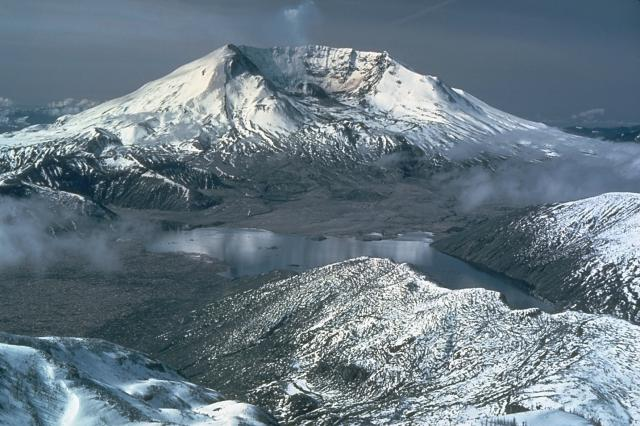

In [7]:
Image(filename='Figures/StHelens.jpg')

Image from: Global Volcanism Program, 2013. St. Helens (321050) in Volcanoes of the World, v. 4.7.5. Venzke, E (ed.). Smithsonian Institution. Downloaded 31 Dec 2018 (https://volcano.si.edu/volcano.cfm?vn=321050)

In [33]:
EruptionData.loc[EruptionData['Volcano Name']=='St. Helens']

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
937,321050,St. Helens,United States,Stratovolcano,Eruption Observed,2008 CE,Canada and Western USA,USA (Washington),46.2,-122.18,2549,Dacite,Subduction zone / Continental crust (>25 km)


As we can see, simple conditional statements like this enable us to filter large datasets for the small amount of information we're interested in.

Although the above statement would work equally well without the **.loc** method, we can add some whistles and bells.   The use of the **.loc** syntax allows you search through a particular column (Series) by putting a comma after your conditional statement followed by another Series name. Say we wanted the 'Last Known Eruption' of all stratovolcanoes.  We could do this:

In [45]:
stratos=EruptionData.loc[EruptionData['Primary Volcano Type'].str.contains('Stratovolcano'),'Last Known Eruption']
stratos.head()

7     1944 CE
10    2020 CE
11    Unknown
12    1230 CE
13    1890 CE
Name: Last Known Eruption, dtype: object

Here we have used the syntax **DataFrame.Series.str.contains( )**.  This allows us to get not only the type "Stratovolcano", but also "Stratovolcano(es)" and anything that has "Stratovolcano" in it.  

It is worth pointing out another way to accomplish the same thing using the method **isin()**.  You can create a list of things you want (or don't want), then test if the string is in the list.  Here is how it would work for this example to select things in the list:


In [12]:
volcano_types=['Stratovolcano','Stratovolcano(es)']
stratos=EruptionData[EruptionData['Primary Volcano Type'].isin(volcano_types)]
stratos.head()

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
7,211020,Vesuvius,Italy,Stratovolcano,Eruption Observed,1944 CE,Mediterranean and Western Asia,Italy,40.821,14.426,1281,Phono-tephrite / Tephri-phonolite,Subduction zone / Continental crust (>25 km)
10,211040,Stromboli,Italy,Stratovolcano,Eruption Observed,2020 CE,Mediterranean and Western Asia,Italy,38.789,15.213,924,Trachyandesite / Basaltic Trachyandesite,Subduction zone / Continental crust (>25 km)
11,211041,Panarea,Italy,Stratovolcano,Evidence Uncertain,Unknown,Mediterranean and Western Asia,Italy,38.638,15.064,399,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km)
12,211042,Lipari,Italy,Stratovolcano(es),Eruption Dated,1230 CE,Mediterranean and Western Asia,Italy,38.490,14.933,590,Rhyolite,Subduction zone / Continental crust (>25 km)
13,211050,Vulcano,Italy,Stratovolcano(es),Eruption Observed,1890 CE,Mediterranean and Western Asia,Italy,38.404,14.962,500,Trachybasalt / Tephrite Basanite,Subduction zone / Continental crust (>25 km)


And here's how it works if you don't want things in the list:

In [13]:
volcano_types=['Stratovolcano','Stratovolcano(es)']
not_stratos=EruptionData[EruptionData['Primary Volcano Type'].isin(volcano_types)==False]
not_stratos.head()

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Maar(s),Eruption Dated,8300 BCE,Mediterranean and Western Asia,Western Europe,50.170,6.85,600,Foidite,Rift zone / Continental crust (>25 km)
1,210020,Chaine des Puys,France,Lava dome(s),Eruption Dated,4040 BCE,Mediterranean and Western Asia,Western Europe,45.775,2.97,1464,Basalt / Picro-Basalt,Rift zone / Continental crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Pyroclastic cone(s),Evidence Credible,Unknown,Mediterranean and Western Asia,Western Europe,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Pyroclastic cone(s),Eruption Dated,3600 BCE,Mediterranean and Western Asia,Western Europe,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental crust (>25 km)
4,211003,Vulsini,Italy,Caldera,Eruption Observed,104 BCE,Mediterranean and Western Asia,Italy,42.600,11.93,800,Trachyte / Trachydacite,Subduction zone / Continental crust (>25 km)


Moving on. 

Now we can do stuff to this filtered DataFrame **stratos**.  The **.loc** syntax also allows you to take a slice through the columns list to select a specific range of column headers:

In [46]:
ColumnSlice=EruptionData.loc[EruptionData['Primary Volcano Type'].str.contains('Stratovolcano'),
                             'Volcano Name':'Last Known Eruption']
ColumnSlice.head()

,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption
7,Vesuvius,Italy,Stratovolcano,Eruption Observed,1944 CE
10,Stromboli,Italy,Stratovolcano,Eruption Observed,2020 CE
11,Panarea,Italy,Stratovolcano,Evidence Uncertain,Unknown
12,Lipari,Italy,Stratovolcano(es),Eruption Dated,1230 CE
13,Vulcano,Italy,Stratovolcano(es),Eruption Observed,1890 CE


Something else **.loc** can do is to change the values _inplace_ in DataFrames easily. Let's say we found a historical document that told us that the Unknown last eruption at Panarea was in 5000 BCE. We want to update the information in the **DataFrame** and can do it this way: 

In [50]:
print ('before modifying:\n',EruptionData.loc[EruptionData['Volcano Name']=='Panarea']['Last Known Eruption'])
EruptionData.loc[EruptionData['Volcano Name']=='Panarea','Last Known Eruption']='5000 BCE'

# and let's take a look: 
print ('after modifying:\n',EruptionData.loc[EruptionData['Volcano Name']=='Panarea'])

before modifying:
 11    Unknown
Name: Last Known Eruption, dtype: object
after modifying:
     Volcano Number Volcano Name Country Primary Volcano Type  \
11          211041      Panarea   Italy        Stratovolcano   

     Activity Evidence Last Known Eruption                          Region  \
11  Evidence Uncertain            5000 BCE  Mediterranean and Western Asia   

   Subregion  Latitude  Longitude  Elevation (m)  \
11     Italy    38.638     15.064            399   

              Dominant Rock Type                              Tectonic Setting  
11  Andesite / Basaltic Andesite  Subduction zone / Continental crust (>25 km)  




As we can see, the syntax for this can get  complicated quickly, but we can retrieve and/or modify lots of data using a few lines of code. 

### Sorting and Indexing

What if we wanted to sort our dataset so the most northerly eruptions come out on top? Pandas DataFrames have a method for this called sort_values. Normally, this will sort from lowest to highest (an "ascending" sort), but we can use the argument **ascending=False** to tell it to sort from highest to lowest.

In [137]:
# First read in our DataFrame again:
EruptionData=pd.read_excel('Datasets/GVP_Volcano_List_Holocene.xls',header=1)
NorthernToSouthern=EruptionData.sort_values(by='Latitude',ascending=False)
NorthernToSouthern.head()

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
1361,377020,East Gakkel Ridge at 85°E,Undersea Features,Submarine,Evidence Credible,1999 CE,Iceland and Arctic Ocean,Arctic Ocean,85.608,85.250,-3800,No Data (checked),Rift zone / Oceanic crust (< 15 km)
1360,376010,Jan Mayen,Norway,Stratovolcano,Eruption Observed,1985 CE,Iceland and Arctic Ocean,Atlantic Ocean (Jan Mayen),71.082,-8.155,2197,Basalt / Picro-Basalt,Rift zone / Oceanic crust (< 15 km)
1359,375010,Kolbeinsey Ridge,Iceland,Submarine,Eruption Observed,1755 CE,Iceland and Arctic Ocean,North of Iceland,66.670,-18.500,5,Basalt / Picro-Basalt,Rift zone / Oceanic crust (< 15 km)
1355,373100,Tjornes Fracture Zone,Iceland,Submarine,Eruption Observed,1868 CE,Iceland and Arctic Ocean,Iceland (northeastern),66.309,-17.118,-75,Basalt / Picro-Basalt,Rift zone / Oceanic crust (< 15 km)
1354,373090,Theistareykir,Iceland,Shield,Eruption Dated,900 BCE,Iceland and Arctic Ocean,Iceland (northeastern),65.833,-17.166,540,Basalt / Picro-Basalt,Rift zone / Oceanic crust (< 15 km)


Looks like the most northerly eruptions during the Holocene were at the East Gakkel Ridge and that the most northerly above sea-level eruption was on Jan Mayen in 1985.  I bet I'm the only person you know who has actually been there!

Now let's try to get the first 10 rows in this DataFrame. We can do this using **.loc**, right?

In [138]:
NorthernToSouthern.loc[0:10]

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Maar(s),Eruption Dated,8300 BCE,Mediterranean and Western Asia,Western Europe,50.170,6.850,600,Foidite,Rift zone / Continental crust (>25 km)
692,290350,Karpinsky Group,Russia,Cone(s),Eruption Observed,1952 CE,Kuril Islands,Kuril Islands,50.148,155.373,1326,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km)
932,320811,Cayley Volcanic Field,Canada,Volcanic field,Evidence Credible,Unknown,Canada and Western USA,Canada,50.120,-123.280,2375,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km)
930,320190,Garibaldi Lake,Canada,Volcanic field,Evidence Credible,Unknown,Canada and Western USA,Canada,49.933,-123.000,2316,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km)
931,320200,Garibaldi,Canada,Stratovolcano,Eruption Dated,8060 BCE,Canada and Western USA,Canada,49.850,-123.000,2678,Dacite,Subduction zone / Continental crust (>25 km)
689,290320,Nemo Peak,Russia,Caldera,Eruption Observed,1938 CE,Kuril Islands,Kuril Islands,49.570,154.808,1018,Andesite / Basaltic Andesite,Subduction zone / Intermediate crust (15-25 km)
817,305020,Keluo Group,China,Pyroclastic cone(s),Evidence Credible,Unknown,Kamchatka and Mainland Asia,China (eastern),49.370,125.920,670,Trachybasalt / Tephrite Basanite,Intraplate / Continental crust (>25 km)
688,290310,Tao-Rusyr Caldera,Russia,Stratovolcano,Eruption Observed,1952 CE,Kuril Islands,Kuril Islands,49.350,154.700,1325,Andesite / Basaltic Andesite,Subduction zone / Intermediate crust (15-25 km)
687,290300,Kharimkotan,Russia,Stratovolcano,Eruption Observed,1933 CE,Kuril Islands,Kuril Islands,49.120,154.508,1145,Andesite / Basaltic Andesite,Subduction zone / Intermediate crust (15-25 km)
684,290260,Chirinkotan,Russia,Stratovolcano,Eruption Observed,2017 CE,Kuril Islands,Kuril Islands,48.980,153.480,724,Andesite / Basaltic Andesite,Subduction zone / Intermediate crust (15-25 km)


Oops!  This didn't work as expected did it?  Instead, we got the all the rows between the _indices_ of 0 and 10 which are not in any particular order now.  When we sorted by Latitude, Pandas did not assign new indices and put the records in no particular order within a particular Latitude value.  This is a "feature" of sorting functions.  So... to get what we really wanted, which was the first 10 records in the NorthernToSouthern DataFrame, we can use the method **.iloc** instead of **.loc**.   

In [139]:
NorthernToSouthern.iloc[0:10]

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
1361,377020,East Gakkel Ridge at 85°E,Undersea Features,Submarine,Evidence Credible,1999 CE,Iceland and Arctic Ocean,Arctic Ocean,85.608,85.250,-3800,No Data (checked),Rift zone / Oceanic crust (< 15 km)
1360,376010,Jan Mayen,Norway,Stratovolcano,Eruption Observed,1985 CE,Iceland and Arctic Ocean,Atlantic Ocean (Jan Mayen),71.082,-8.155,2197,Basalt / Picro-Basalt,Rift zone / Oceanic crust (< 15 km)
1359,375010,Kolbeinsey Ridge,Iceland,Submarine,Eruption Observed,1755 CE,Iceland and Arctic Ocean,North of Iceland,66.670,-18.500,5,Basalt / Picro-Basalt,Rift zone / Oceanic crust (< 15 km)
1355,373100,Tjornes Fracture Zone,Iceland,Submarine,Eruption Observed,1868 CE,Iceland and Arctic Ocean,Iceland (northeastern),66.309,-17.118,-75,Basalt / Picro-Basalt,Rift zone / Oceanic crust (< 15 km)
1354,373090,Theistareykir,Iceland,Shield,Eruption Dated,900 BCE,Iceland and Arctic Ocean,Iceland (northeastern),65.833,-17.166,540,Basalt / Picro-Basalt,Rift zone / Oceanic crust (< 15 km)
1352,373080,Krafla,Iceland,Caldera,Eruption Observed,1984 CE,Iceland and Arctic Ocean,Iceland (northeastern),65.715,-16.728,800,Basalt / Picro-Basalt,Rift zone / Oceanic crust (< 15 km)
1353,373082,Heidarspordar,Iceland,Fissure vent,Confirmed Eruption,300 BCE,Iceland and Arctic Ocean,Iceland (northeastern),65.583,-16.817,490,NaN,Rift zone / Oceanic crust (< 15 km)
904,314060,Imuruk Lake,United States,Shield(s),Eruption Dated,300 CE,Alaska,Alaska (western),65.517,-163.450,610,Basalt / Picro-Basalt,Intraplate / Continental crust (>25 km)
1351,373070,Fremrinamar,Iceland,Stratovolcano,Eruption Dated,1200 BCE,Iceland and Arctic Ocean,Iceland (northeastern),65.416,-16.666,970,Basalt / Picro-Basalt,Rift zone / Oceanic crust (< 15 km)
1350,373060,Askja,Iceland,Stratovolcano,Eruption Observed,1961 CE,Iceland and Arctic Ocean,Iceland (northeastern),65.033,-16.783,1080,Basalt / Picro-Basalt,Rift zone / Oceanic crust (< 15 km)


Much better. Now we can see that there were lots of  eruptions during the Holocene on Iceland.  Can you think of how to get names of all of the Icelandic volcanoes that erupted during the Holocene?  

But to solve our indexing problem with **.loc( )**,  by re-indexing our sorted DataFrame.  To re-index a Pandas DataFrame,  we use the  **.set_index( )** method. 

This will set the index to a list of values from 0 to the length of the Dataframe.

In [140]:
# make a list of integers between zero up to (but not including) the length of the DataFrame
newIndexValues=list(range(len(NorthernToSouthern))) 
# reset the indices to this list
NorthernToSouthern=NorthernToSouthern.set_index([newIndexValues])
NorthernToSouthern.head()

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
0,377020,East Gakkel Ridge at 85°E,Undersea Features,Submarine,Evidence Credible,1999 CE,Iceland and Arctic Ocean,Arctic Ocean,85.608,85.250,-3800,No Data (checked),Rift zone / Oceanic crust (< 15 km)
1,376010,Jan Mayen,Norway,Stratovolcano,Eruption Observed,1985 CE,Iceland and Arctic Ocean,Atlantic Ocean (Jan Mayen),71.082,-8.155,2197,Basalt / Picro-Basalt,Rift zone / Oceanic crust (< 15 km)
2,375010,Kolbeinsey Ridge,Iceland,Submarine,Eruption Observed,1755 CE,Iceland and Arctic Ocean,North of Iceland,66.670,-18.500,5,Basalt / Picro-Basalt,Rift zone / Oceanic crust (< 15 km)
3,373100,Tjornes Fracture Zone,Iceland,Submarine,Eruption Observed,1868 CE,Iceland and Arctic Ocean,Iceland (northeastern),66.309,-17.118,-75,Basalt / Picro-Basalt,Rift zone / Oceanic crust (< 15 km)
4,373090,Theistareykir,Iceland,Shield,Eruption Dated,900 BCE,Iceland and Arctic Ocean,Iceland (northeastern),65.833,-17.166,540,Basalt / Picro-Basalt,Rift zone / Oceanic crust (< 15 km)


Another thing about indices:  We can set the indices to one of the other column names, for example the "Volcano Name".  

In [141]:
NorthernToSouthern=NorthernToSouthern.set_index('Volcano Name')
NorthernToSouthern.head()

,Volcano Number,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
Volcano Name,,,,,,,,,,,,
East Gakkel Ridge at 85°E,377020,Undersea Features,Submarine,Evidence Credible,1999 CE,Iceland and Arctic Ocean,Arctic Ocean,85.608,85.250,-3800,No Data (checked),Rift zone / Oceanic crust (< 15 km)
Jan Mayen,376010,Norway,Stratovolcano,Eruption Observed,1985 CE,Iceland and Arctic Ocean,Atlantic Ocean (Jan Mayen),71.082,-8.155,2197,Basalt / Picro-Basalt,Rift zone / Oceanic crust (< 15 km)
Kolbeinsey Ridge,375010,Iceland,Submarine,Eruption Observed,1755 CE,Iceland and Arctic Ocean,North of Iceland,66.670,-18.500,5,Basalt / Picro-Basalt,Rift zone / Oceanic crust (< 15 km)
Tjornes Fracture Zone,373100,Iceland,Submarine,Eruption Observed,1868 CE,Iceland and Arctic Ocean,Iceland (northeastern),66.309,-17.118,-75,Basalt / Picro-Basalt,Rift zone / Oceanic crust (< 15 km)
Theistareykir,373090,Iceland,Shield,Eruption Dated,900 BCE,Iceland and Arctic Ocean,Iceland (northeastern),65.833,-17.166,540,Basalt / Picro-Basalt,Rift zone / Oceanic crust (< 15 km)


### Sorting by awkward strings

In this example data set, the dates for the last known eruption are the dates in CE or BCE or unknown, so we cannot sort by that column header.  But we can first drop all the rows where the 'Last Known Eruption' is 'unknown', then split the dates on the space, multiply all the dates with 'BCE' in them by -1 and sort by the resulting column.  

Let's do that step by step:

- to drop all the 'unknown' eruption dates, we can use the filtering statement:

In [169]:
EruptionData=pd.read_excel('Datasets/GVP_Volcano_List_Holocene.xls',header=1) # read this in again
KnownEruptionDates=EruptionData[EruptionData['Last Known Eruption'].str.contains('unknown')==False]

To see if this worked, we can look at all the unique eruption dates and see if 'unknown' is still there:

In [170]:
KnownEruptionDates[KnownEruptionDates['Last Known Eruption'].str.contains('unknown')]

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting


Nope.  So now step 2: 

- To split a string on a particular key, in this case a space, we can use the syntax:

EruptionData\['Last Known Eruption'\].str.split()



In [171]:
KnownEruptionDates['Last Known Eruption'].str.split().head()

0    [8300, BCE]
1    [4040, BCE]
2      [Unknown]
3    [3600, BCE]
4     [104, BCE]
Name: Last Known Eruption, dtype: object

Whoa!  some of the entries are 'Unknown' and not 'unknown'.  Sloppy!  But we can handle that:

In [172]:
KnownEruptionDates=KnownEruptionDates[KnownEruptionDates['Last Known Eruption'].str.contains('Unknown')==False]

More on splitting:  It turns out that a space is the default for **split**.  We don't really want to do this, but if we DID, we could split on the 'C' like so: 


In [173]:
KnownEruptionDates['Last Known Eruption'].str.split('C').head()

0    [8300 B, E]
1    [4040 B, E]
3    [3600 B, E]
4     [104 B, E]
6     [1538 , E]
Name: Last Known Eruption, dtype: object

See how the **.str.split()** method returns a list with the stuff before the split key as the first element and the stuff after the key is the second. 

We can make two arrays, one for the date and one for the 'CE' or 'BCE' tag.  We first make an array (using the DataFrame method **.values**,  transpose the array and assign the first row to a dataframe column named 'date' and the second row to a column named  'CE/BCE'.  

In [174]:
dates=KnownEruptionDates['Last Known Eruption'].str.split(' ',expand=True).transpose()
print (dates.values)


[['8300' '4040' '3600' ... '1911' '2016' '1962']
 ['BCE' 'BCE' 'BCE' ... 'CE' 'CE' 'CE']]


In [175]:
# put in the 'date' column:
KnownEruptionDates['date']=dates.values[0].astype('int')
# put in the 'CE/BCE' column:
KnownEruptionDates['CE/BCE']=dates.values[1].astype('str')



Because Pandas read in the 'Last Known Eruption' as a string, we need to convert the first part to an integer (that is the **.astype('int')** bit above). This means we can  multiply the date in records with 'BCE' by -1.  


In [176]:
KnownEruptionDates.loc[KnownEruptionDates['CE/BCE'].str.contains('BCE'),'date']=-1*KnownEruptionDates['date']
KnownEruptionDates.sort_values(by='date').head()

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting,date,CE/BCE
127,222161,Igwisi Hills,Tanzania,Pyroclastic cone(s),Eruption Dated,10450 BCE,Africa and Red Sea,Africa (eastern),-4.889,31.933,1146,Foidite,Rift zone / Continental crust (>25 km),-10450,BCE
561,283141,Nantaisan,Japan,Stratovolcano,Eruption Dated,9540 BCE,"Japan, Taiwan, Marianas",Honshu,36.765,139.491,2486,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km),-9540,BCE
974,327812,Red Hill,United States,Volcanic field,Eruption Dated,9450 BCE,Canada and Western USA,USA (New Mexico),34.250,-108.830,2300,Basalt / Picro-Basalt,Rift zone / Continental crust (>25 km),-9450,BCE
964,324010,Black Butte Crater Lava Field,United States,Shield,Eruption Dated,8400 BCE,Canada and Western USA,USA (Idaho),43.183,-114.352,1478,Basalt / Picro-Basalt,Rift zone / Continental crust (>25 km),-8400,BCE
1400,390022,Berlin,Antarctica,Shield(s),Eruption Dated,8350 BCE,Antarctica,Antarctica and South Sandwich Islands,-76.050,-136.000,3478,Trachyte / Trachydacite,Intraplate / Continental crust (>25 km),-8350,BCE


### Concatenation

We've been working on a data set that only had Holocene data in it, but the same Smithsonian website has a data set for Pleistocene volcanic eruptions too.  We can concatentate both data sets into a single DataFrame (as long as they have the same columns) like this:  

In [238]:
HoloceneEruptionData=pd.read_excel('Datasets/GVP_Volcano_List_Holocene.xls',header=1) # read this in again
PleistoceneEruptionData=pd.read_excel('Datasets/GVP_Volcano_List_Pleistocene.xls',header=1) # read this in again
# get both Unknown and unknown out!
RecentEruptionData=pd.concat([HoloceneEruptionData,PleistoceneEruptionData])
RecentEruptionData.head()

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Maar(s),Eruption Dated,8300 BCE,Mediterranean and Western Asia,Western Europe,50.170,6.85,600,Foidite,Rift zone / Continental crust (>25 km)
1,210020,Chaine des Puys,France,Lava dome(s),Eruption Dated,4040 BCE,Mediterranean and Western Asia,Western Europe,45.775,2.97,1464,Basalt / Picro-Basalt,Rift zone / Continental crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Pyroclastic cone(s),Evidence Credible,Unknown,Mediterranean and Western Asia,Western Europe,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Pyroclastic cone(s),Eruption Dated,3600 BCE,Mediterranean and Western Asia,Western Europe,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental crust (>25 km)
4,211003,Vulsini,Italy,Caldera,Eruption Observed,104 BCE,Mediterranean and Western Asia,Italy,42.600,11.93,800,Trachyte / Trachydacite,Subduction zone / Continental crust (>25 km)


In [185]:
RecentEruptionData.tail()

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
1235,461838,Raja-Sabanda,Indonesia,Unknown,NaN,NaN,Indonesia,Sumatra,-2.228,101.430,2527,NaN,Unknown
1236,461839,Hulunilo,Indonesia,Stratovolcano,NaN,NaN,Indonesia,Sumatra,-2.418,101.776,2469,NaN,Unknown
1237,461840,Tungkat,Indonesia,Unknown,NaN,NaN,Indonesia,Sumatra,-2.480,102.026,1576,NaN,Unknown
1238,464807,Ramu-Labumbu,Indonesia,Unknown,NaN,NaN,Indonesia,Lesser Sunda Islands,-8.416,118.207,1086,NaN,Unknown
1239,590835,Discovery,Antarctica,Stratovolcano,NaN,NaN,Antarctica,Antarctica and South Sandwich Islands,-78.374,165.015,2578,NaN,Intraplate / Continental crust (>25 km)


So a lot less is known about the Pleistocene eruptions than the Holocene ones.  

There is another data set on the Smithsonian Website that is interesting.  It has a list of all the currently active volcanoes. 

In [206]:
ActiveVolcanoes=pd.read_excel('Datasets/ActiveVolcanoes.xlsx')
ActiveVolcanoes.head()

,Volcano,Country,Eruption Start Date,Eruption Stop Date,Max VEI
0,Kuchinoerabujima,Japan,2020 Jan 11,2020 Feb 13 (continuing),NaN
1,Semisopochnoi,United States,2019 Dec 7,2020 Feb 16 (continuing),NaN
2,Nishinoshima,Japan,2019 Dec 5,2020 Feb 15 (continuing),1.0
3,Kikai,Japan,2019 Nov 2,2020 Feb 11 (continuing),NaN
4,Klyuchevskoy,Russia,2019 Oct 24,2020 Feb 19 (continuing),NaN


There's a lot more information about each volcano in our HoloceneEruptionData DataFrame, which we could attach to the use Pandas **merge( )** method.  There are many ways to use **merge**, but the idea is to identify what kind of join you want:  

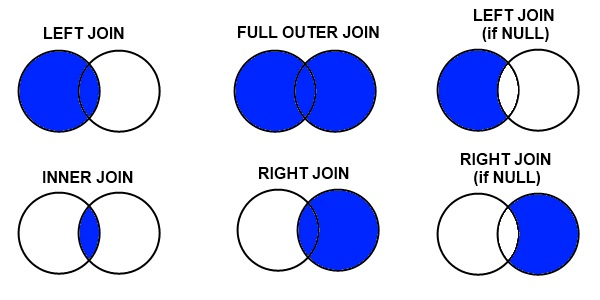

In [233]:
Image(filename='Figures/join-types.jpg')

We want to pair all the stuff from the Holocene volcanoes database with the ActiveVolcanoes data if it isn't already there ('Country' for example is in both).  

In [249]:
MergedVolcanoes=ActiveVolcanoes.merge(KnownEruptionDates,how='left',left_on='Volcano',right_on='Volcano Name')
MergedVolcanoes.head()

,Volcano,Country_x,Eruption Start Date,Eruption Stop Date,Max VEI,Volcano Number,Volcano Name,Country_y,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting,date,CE/BCE
0,Kuchinoerabujima,Japan,2020 Jan 11,2020 Feb 13 (continuing),NaN,282050.0,Kuchinoerabujima,Japan,Stratovolcano(es),Eruption Observed,2020 CE,"Japan, Taiwan, Marianas",Ryukyu Islands and Kyushu,30.443,130.217,657.0,Andesite / Basaltic Andesite,Subduction zone / Oceanic crust (< 15 km),2020.0,CE
1,Semisopochnoi,United States,2019 Dec 7,2020 Feb 16 (continuing),NaN,311060.0,Semisopochnoi,United States,Stratovolcano,Eruption Observed,2020 CE,Alaska,Aleutian Islands,51.930,179.580,1221.0,Basalt / Picro-Basalt,Subduction zone / Intermediate crust (15-25 km),2020.0,CE
2,Nishinoshima,Japan,2019 Dec 5,2020 Feb 15 (continuing),1.0,284096.0,Nishinoshima,Japan,Caldera,Eruption Observed,2020 CE,"Japan, Taiwan, Marianas","Izu, Volcano, and Mariana Islands",27.247,140.874,25.0,Andesite / Basaltic Andesite,Subduction zone / Crustal thickness unknown,2020.0,CE
3,Kikai,Japan,2019 Nov 2,2020 Feb 11 (continuing),NaN,282060.0,Kikai,Japan,Caldera,Eruption Observed,2020 CE,"Japan, Taiwan, Marianas",Ryukyu Islands and Kyushu,30.793,130.305,704.0,Rhyolite,Subduction zone / Oceanic crust (< 15 km),2020.0,CE
4,Klyuchevskoy,Russia,2019 Oct 24,2020 Feb 19 (continuing),NaN,300260.0,Klyuchevskoy,Russia,Stratovolcano,Eruption Observed,2020 CE,Kamchatka and Mainland Asia,Kamchatka Peninsula,56.056,160.642,4754.0,Basalt / Picro-Basalt,Subduction zone / Continental crust (>25 km),2020.0,CE


You see that if a particular column (say 'Country') is in both DataFrames, the first one gets renamed 'Country_x' and the other one 'Country_y'.  To clean that up we can rename the first to 'Country', then delete (drop) the second one out of the DataFrame.  We also want to delete the column 'Volcano Name' because it is redundant.


In [250]:
MergedVolcanoes.rename(columns={'Country_x':'Country'},inplace=True)
MergedVolcanoes.drop(['Country_y','Volcano Name'],axis=1,inplace=True)
MergedVolcanoes.head()

,Volcano,Country,Eruption Start Date,Eruption Stop Date,Max VEI,Volcano Number,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting,date,CE/BCE
0,Kuchinoerabujima,Japan,2020 Jan 11,2020 Feb 13 (continuing),NaN,282050.0,Stratovolcano(es),Eruption Observed,2020 CE,"Japan, Taiwan, Marianas",Ryukyu Islands and Kyushu,30.443,130.217,657.0,Andesite / Basaltic Andesite,Subduction zone / Oceanic crust (< 15 km),2020.0,CE
1,Semisopochnoi,United States,2019 Dec 7,2020 Feb 16 (continuing),NaN,311060.0,Stratovolcano,Eruption Observed,2020 CE,Alaska,Aleutian Islands,51.930,179.580,1221.0,Basalt / Picro-Basalt,Subduction zone / Intermediate crust (15-25 km),2020.0,CE
2,Nishinoshima,Japan,2019 Dec 5,2020 Feb 15 (continuing),1.0,284096.0,Caldera,Eruption Observed,2020 CE,"Japan, Taiwan, Marianas","Izu, Volcano, and Mariana Islands",27.247,140.874,25.0,Andesite / Basaltic Andesite,Subduction zone / Crustal thickness unknown,2020.0,CE
3,Kikai,Japan,2019 Nov 2,2020 Feb 11 (continuing),NaN,282060.0,Caldera,Eruption Observed,2020 CE,"Japan, Taiwan, Marianas",Ryukyu Islands and Kyushu,30.793,130.305,704.0,Rhyolite,Subduction zone / Oceanic crust (< 15 km),2020.0,CE
4,Klyuchevskoy,Russia,2019 Oct 24,2020 Feb 19 (continuing),NaN,300260.0,Stratovolcano,Eruption Observed,2020 CE,Kamchatka and Mainland Asia,Kamchatka Peninsula,56.056,160.642,4754.0,Basalt / Picro-Basalt,Subduction zone / Continental crust (>25 km),2020.0,CE


Looks like it worked.



### Using .unique( ) to find a list of categories, and string operations

Now that we have more information, we can start classifying these eruptions by type. For example, what tectonic settings are represented in this dataset? Pandas has a method called **.unique( )** that allows us to find all the unique values in a column.

In [251]:
list(MergedVolcanoes['Tectonic Setting'].unique())

['Subduction zone / Oceanic crust (< 15 km)',
 'Subduction zone / Intermediate crust (15-25 km)',
 'Subduction zone / Crustal thickness unknown',
 'Subduction zone / Continental crust (>25 km)',
 'Intraplate / Oceanic crust (< 15 km)',
 'Rift zone / Continental crust (>25 km)',
 nan,
 'Intraplate / Continental crust (>25 km)',
 'Rift zone / Intermediate crust (15-25 km)']

This tells us some useful information, including that some of the values are not a number (or 'nan' in Pandish). We can get rid of these using the method **.dropna( )**.  While we are at it, we can delete the rows with no information on 'Volcanic Explosivity Index' data (Max VEI).  

In [252]:
MergedVolcanoes.dropna(subset=['Tectonic Setting'],inplace=True)
MergedVolcanoes.head()
# inplace=True does the method 'in place' so we don't have to assign it to a new DataFrame

,Volcano,Country,Eruption Start Date,Eruption Stop Date,Max VEI,Volcano Number,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting,date,CE/BCE
0,Kuchinoerabujima,Japan,2020 Jan 11,2020 Feb 13 (continuing),NaN,282050.0,Stratovolcano(es),Eruption Observed,2020 CE,"Japan, Taiwan, Marianas",Ryukyu Islands and Kyushu,30.443,130.217,657.0,Andesite / Basaltic Andesite,Subduction zone / Oceanic crust (< 15 km),2020.0,CE
1,Semisopochnoi,United States,2019 Dec 7,2020 Feb 16 (continuing),NaN,311060.0,Stratovolcano,Eruption Observed,2020 CE,Alaska,Aleutian Islands,51.930,179.580,1221.0,Basalt / Picro-Basalt,Subduction zone / Intermediate crust (15-25 km),2020.0,CE
2,Nishinoshima,Japan,2019 Dec 5,2020 Feb 15 (continuing),1.0,284096.0,Caldera,Eruption Observed,2020 CE,"Japan, Taiwan, Marianas","Izu, Volcano, and Mariana Islands",27.247,140.874,25.0,Andesite / Basaltic Andesite,Subduction zone / Crustal thickness unknown,2020.0,CE
3,Kikai,Japan,2019 Nov 2,2020 Feb 11 (continuing),NaN,282060.0,Caldera,Eruption Observed,2020 CE,"Japan, Taiwan, Marianas",Ryukyu Islands and Kyushu,30.793,130.305,704.0,Rhyolite,Subduction zone / Oceanic crust (< 15 km),2020.0,CE
4,Klyuchevskoy,Russia,2019 Oct 24,2020 Feb 19 (continuing),NaN,300260.0,Stratovolcano,Eruption Observed,2020 CE,Kamchatka and Mainland Asia,Kamchatka Peninsula,56.056,160.642,4754.0,Basalt / Picro-Basalt,Subduction zone / Continental crust (>25 km),2020.0,CE


### .groupby( ) and .describe( )

Pandas has a couple more methods that might be useful for looking at the distribution of these data. These are the **.groupby( )** and **.describe( )** methods. We can use these methods to look at the typical volcano types type for each tectonic setting in our dataset.

**.groupby( )** groups things in your DataFrame by unique values in a **Series**, for example grouping everything by 'Tectonic Setting'.    **.describe( )** summarizes some useful statistics.  So if we wanted to know basic statistics for each tectonic setting (and who wouldn't?), we would do: 

In [255]:
MergedVolcanoes.groupby('Tectonic Setting')['Primary Volcano Type'].describe()

,count,unique,top,freq
Tectonic Setting,,,,
Intraplate / Continental crust (>25 km),1,1,Stratovolcano,1
Intraplate / Oceanic crust (< 15 km),2,2,Stratovolcano,1
Rift zone / Continental crust (>25 km),2,2,Stratovolcano,1
Rift zone / Intermediate crust (15-25 km),1,1,Shield,1
Subduction zone / Continental crust (>25 km),25,4,Stratovolcano,15
Subduction zone / Crustal thickness unknown,3,3,Stratovolcano,1
Subduction zone / Intermediate crust (15-25 km),2,1,Stratovolcano,2
Subduction zone / Oceanic crust (< 15 km),7,4,Stratovolcano,3


This tells us that around of 15 active shallow subduction zone volcanoes of which 15 were stratovolcanoes.

### Assignment #4
Create a new notebook with the name format: Lastname_Inital_HomeworkNumber.  For example, **Cych_B_HW_4**

Create a markdown block in which you will describe what the notebook does. 

### 1. 
The  equations for an ellipse are:  
> x =a cos( $\theta$ )   ,            y=b sin( $\theta$ ) 
<br>$a$ is the major radius 
<br>$b$ is the minor radius 
<br>$\theta$ is the angle 
    
-  Write a **lambda function** that returns $x$ and $y$ given $a$, $b$, and $\theta$.  Assume that theta goes from 0 to 360. Remember that trig functions assume the arguments are in radians
    -  Plot your ellipse using **matplotlib.pyplot**  (imported as **plt**). Use the **%matplotlib inline** magic command
    - To make the axes of equal length, use the **plt.axis('equal')** command.  Otherwise, your axes will be squished.  


### 2. 
- Write a **lambda function** that returns the square of an input parameter $x$
    - Use **map( )** to generate a list of squares for a sequence with 10 values
    - Use **filter( )** and the lambda function to generate a list of numbers whose squares  are between 5 and 50.
    -  Use a **list comprehension** to generate the same list with only one line of code.


### 3. 
- Create a **Class**, it should include at least 3 **attributes** and 3 **methods**. Be creative! Here are a few possibilities- Card, Deck, Planet, Phone Contact, Ocean, Student, Cellphone, Dog, Car
    - Save your class in a **module**, import the module into your notebook
    - Create 3 **instances** of your class, change the value of at least one attribute for one instance of your class 
    - Call all three of your methods-  you can use any of the instances of your class
    
### 4.
- Read in the ActiveVolcanoes.xlsx and GVP_Volcano_List_Holocene.xls files.
    - Merge the two on the name of the volcano.  
    - Delete all the rows with no Max VEI field.  (VEI stands for volcanic explosive index.)
    - Group by tectonic setting and describe by the 'Max VEI' field. Which volcanic setting has the largest explosive index? 

### 5. 
- Read the data file "Datasets/NAVDAT/NAVDAT.csv" into a pandas DataFrame
    - Find all the igneous units with ages less than 23 Ma (Neogene).
    - San Diego is located at: (33,-117)
    - Calculate the great circle distance from San Diego to every Neogene igneous unit (Hint: use the module you made for  Lecture 9  to do this). 
    - Calculate the distance to the nearest Neogene igneous unit. 
    - Print out the distance in km with one significant figure. Hint: Use **map( )** and **reduce( )**.

